In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss

In [2]:
"""
数据集：porto seguro safe driver prediction（kaggle 2017年比赛）
Porto Seguro是巴西最大的汽车与住房保险公司之一，根据汽车保单持有
人的数据建立机器学习模型，分析该持有人是否会在次年提出索赔。
使用GBDT+LR模型进行预测，并计算Normalized Cross Entropy
"""
#加载数据
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
#查看数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [4]:
#查看特征取值
for c in data.columns:
    print(data[c].value_counts())

1050623    1
492634     1
320566     1
326709     1
1373236    1
          ..
1477974    1
1380820    1
645742     1
647785     1
1361738    1
Name: id, Length: 595212, dtype: int64
0    573518
1     21694
Name: target, dtype: int64
0    187594
1    143984
2     82468
5     61464
3     51193
4     33524
6     17682
7     17303
Name: ps_ind_01, dtype: int64
 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64
2     96110
3     81973
1     67994
4     67213
5     62803
6     60406
7     52364
8     39667
9     25436
0     15514
10    14484
11    11248
Name: ps_ind_03, dtype: int64
 0    346965
 1    248164
-1        83
Name: ps_ind_04_cat, dtype: int64
 0    528009
 6     20662
 4     18344
 1      8322
 3      8233
-1      5809
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64
0    360852
1    234360
Name: ps_ind_06_bin, dtype: int64
0    442223
1    152989
Name: ps_ind_07_bin, dtype: int64
0    497644
1     97568
Name: ps_ind_08_b

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='target'>

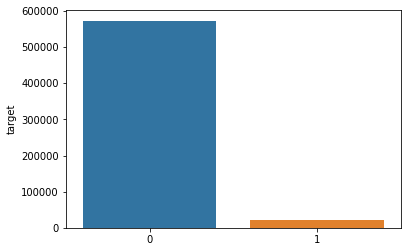

In [15]:
#查看标签分布
sns.barplot(data["target"].unique(),data["target"].value_counts())

In [6]:
#准备数据,去掉无关列id
X = data.drop(["id","target"],axis =1)
y = data["target"]

In [7]:
#划分数据集为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 33)
#再将训练集分为两部分（gbdt，lr)
X_train_gbdt,X_train_lr,y_train_gbdt,y_train_lr = train_test_split(X_train,y_train,test_size = 0.5,random_state = 33)

In [8]:
#基于GBDT的监督变换
gbdt = GradientBoostingClassifier(n_estimators = 10)
gbdt.fit(X_train_gbdt,y_train_gbdt)

GradientBoostingClassifier(n_estimators=10)

In [9]:
# print(gbdt.apply(X_train_gbdt))

In [10]:
#得到OneHot编码
gbdt_oht = OneHotEncoder(categories = "auto")
gbdt_oht.fit(gbdt.apply(X_train_gbdt)[:,:,0])

OneHotEncoder()

In [11]:
#使用OneHot编码特征，训练LR
gbdt_lr = LogisticRegression(solver = 'lbfgs',max_iter = 1000,class_weight = "balanced")
gbdt_lr.fit(gbdt_oht.transform(gbdt.apply(X_train_lr)[:,:,0]),y_train_lr)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [12]:
#使用LR进行预测
y_pred_gbdt_lr = gbdt_lr.predict_proba(gbdt_oht.transform(gbdt.apply(X_test)[:,:,0]))[:,1]
score = log_loss(y_test,y_pred_gbdt_lr)
print('GBDT_LR的log_loss:',score)

GBDT_LR的log_loss: 0.6674650884403919


In [19]:
#计算测试集使用GBDT_LR的normalized cross entropy
p = len(data[data["target"] ==1])/len(data)
bg_score = -(p * np.log(p) +(1-p)*np.log(1 -p))
NE = score/bg_score
print("Normalized Cross Entropy: " ,NE)

Normalized Cross Entropy:  4.2653624834344
